In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline

In [19]:
df = {}
case = "model-4-true-true"

# deephyper-RF
label = "deephyper 4"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])
    
# case = "model-8-true-true"

# # deephyper-RF
# label = "deephyper 8"
# df[label] = []
# for i in range(1,6):
#     df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
#     df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])

# label = "deephyper 8+TL"
# df[label] = []
# for i in range(1,5):
#     df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-tl-{i}/results.csv"))
#     df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])
    
# # deephyper-DUMMY
# df["deephyper-DUMMY"] = []
# for i in range(1,6):
#     df["deephyper-DUMMY"].append(pd.read_csv(f"exp/deephyper_dummy/{case}-{i}/results.csv"))
#     df["deephyper-DUMMY"][i-1]["objective"] = np.exp(-df["deephyper-DUMMY"][i-1]["objective"])

    
# # optuna-TPE
# df["optuna-TPE"] = []
# for i in range(1,6):
#     df["optuna-TPE"].append(pd.read_csv(f"exp/optuna_tpe/{case}-{i}/results.csv"))
#     df["optuna-TPE"][i-1]["objective"] = np.exp(df["optuna-TPE"][i-1]["objective"])
    
# optuna-CMAES
# df["optuna-CMAES"] = []
# for i in range(1,6):
#     df["optuna-CMAES"].append(pd.read_csv(f"exp/optuna_cmaes/{case}-{i}/results.csv"))
#     df["optuna-CMAES"][i-1]["objective"] = np.exp(df["optuna-CMAES"][i-1]["objective"])

# GPTune
label = "gptune 4"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
    duration = df[label][i-1]["objective"]
    timestamp = df[label][i-1]["elapsed_sec"] - 1
    df[label][i-1]["timestamp_end"] = duration.cumsum() + timestamp

colors = {
    "deephyper 4": "cyan",
    "deephyper 8": "magenta",
    "deephyper 8+TL": "darkviolet",
    "deephyper-DUMMY": "lime",
    "optuna-TPE": "red",
    "optuna-CMAES": "yellow",
    "gptune 4": "orange",
}

linestyle = {
    "deephyper 4": "--",
    "deephyper 8": "--",
    "deephyper 8+TL": "-",
    "gptune 4": "--"
}

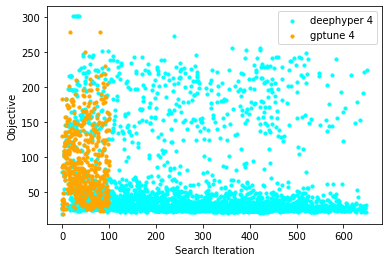

In [20]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i
        x = list(range(len(subdf["objective"])))
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlabel("Search Iteration")
plt.ylabel("Objective")
plt.show()

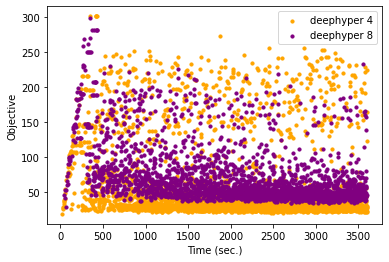

In [55]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i
        x = subdf["timestamp_end"]
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.show()

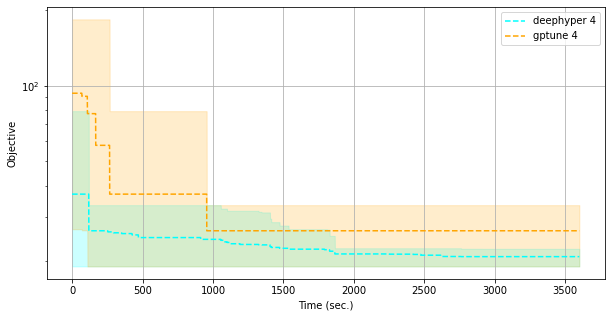

In [22]:
plt.figure(figsize=(10, 5))

for k, df_list in df.items():
    T = np.linspace(0, 3600, 3601)
    y_list = []
    for i, df_i in enumerate(df_list):
        df_i = df_i.sort_values("timestamp_end")
        x, y = df_i.timestamp_end.to_numpy(), df_i.objective.cummin().to_numpy()
        f = interp1d(x, y, kind="previous", fill_value="extrapolate")
        y = f(T)
        y_list.append(y)

    y_list = np.asarray(y_list)
    y_mean = y_list.mean(axis=0)
    y_min = y_list.min(axis=0)
    y_max = y_list.max(axis=0)

    plt.plot(T, y_mean, color=colors[k], linestyle=linestyle[k], label=k)
    plt.fill_between(T, y_min, y_max, color=colors[k], alpha=0.2)

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.grid()
plt.yscale("log")
plt.show()

In [22]:
df = {}
case = "model-8-true-true"

# deephyper-RF
df["deephyper-RF"] = []
for i in range(1,6):
    df["deephyper-RF"].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
    df["deephyper-RF"][i-1]["objective"] = np.exp(-df["deephyper-RF"][i-1]["objective"])
    
df["deephyper-RF+TL"] = []
for i in range(1,6):
    df["deephyper-RF+TL"].append(pd.read_csv(f"exp/deephyper_rf/{case}-tl-{i}/results.csv"))
    df["deephyper-RF+TL"][i-1]["objective"] = np.exp(-df["deephyper-RF+TL"][i-1]["objective"])

# # deephyper-GP
# df["deephyper-GP"] = []
# for i in range(1,6):
#     df["deephyper-GP"].append(pd.read_csv(f"exp/deephyper_gp/{case}-{i}/results.csv"))
#     df["deephyper-GP"][i-1]["objective"] = np.exp(-df["deephyper-GP"][i-1]["objective"])
    
# # deephyper-DUMMY
# df["deephyper-DUMMY"] = []
# for i in range(1,6):
#     df["deephyper-DUMMY"].append(pd.read_csv(f"exp/deephyper_dummy/{case}-{i}/results.csv"))
#     df["deephyper-DUMMY"][i-1]["objective"] = np.exp(-df["deephyper-DUMMY"][i-1]["objective"])

    
# # optuna-TPE
# df["optuna-TPE"] = []
# for i in range(1,6):
#     df["optuna-TPE"].append(pd.read_csv(f"exp/optuna_tpe/{case}-{i}/results.csv"))
#     df["optuna-TPE"][i-1]["objective"] = np.exp(df["optuna-TPE"][i-1]["objective"])

# # GPTune
# df["gptune"] = []
# for i in range(1,2):
#     df["gptune"].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
#     df["gptune"][i-1]["objective"] = np.exp(df["gptune"][i-1]["objective"])

colors = {
    "deephyper-RF": "orange",
    "deephyper-RF+TL": "orange",
    "deephyper-GP": "cyan",
    "deephyper-DUMMY": "lime",
    "optuna-TPE": "red",
    "optuna-CMAES": "yellow",
    "gptune": "purple",
}

linestyle = {
    "deephyper-RF": "--",
    "deephyper-RF+TL": "-",
    "deephyper-GP": "cyan",
    "deephyper-DUMMY": "lime",
    "optuna-TPE": "red",
    "optuna-CMAES": "yellow",
    "gptune": "purple",
}

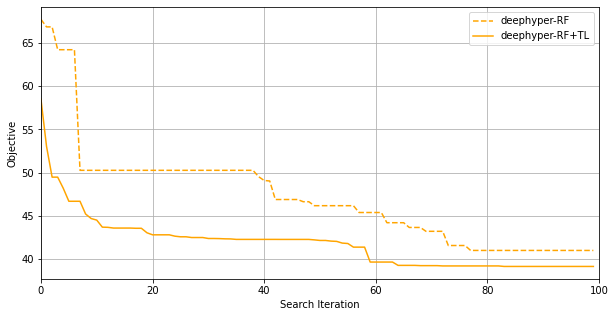

In [23]:
plt.figure(figsize=(10, 5))

x = np.arange(100)
for k, df_list in df.items():
    Y = []
    for i, df_i in enumerate(df_list):
        subdf = df_i.iloc[:100]
        Y.append(subdf["objective"].cummin())
    Y = np.asarray(Y)
    y_mean = Y.mean(axis=0)
    y_std = Y.std(axis=0)
    plt.plot(x, y_mean, color=colors[k], linestyle=linestyle[k], label=k)
#     plt.fill_between(x, y_mean - 1.96*y_std, y_mean + 1.96*y_std, color=colors[k], alpha=0.2)

plt.legend()
plt.xlim(0, 100)
plt.xlabel("Search Iteration")
plt.ylabel("Objective")
plt.grid()
plt.show()